Description

In [ ]:
# ZF43 titration with 203bp. Using plasmids to titrate.

# Import Functions and set directories

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../../datadir_srk.txt').read_text())
#datadir = Path(Path('../datadir_yb.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/fig3_ZF43titr/fig3_'

%store -r s_promoters43_normEF1a
s_promoters43_normEF1a = s_promoters43_normEF1a
%store -r s_promoters43_normUBC
s_promoters43_normUBC = s_promoters43_normUBC
%store -r s_promoters43_normEFS
s_promoters43_normEFS = s_promoters43_normEFS

print(sns.__version__)


0.11.2


Make color map

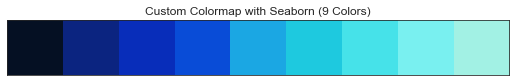

In [2]:
def create_custom_colormap(num_colors=9):
    # Define the original colors and their positions
    colors = [(5/255, 16/255, 35/255), 
              (13/255, 44/255, 160/255),
              (4/255, 46/255, 212/255), 
              (27/255, 167/255, 227/255), 
              (32/255, 213/255, 222/255),
              (108/255, 240/255, 245/255), 
              (162/255, 241/255, 228/255)]  # RGB values for each color
    positions = np.linspace(0, 1, len(colors))  # Equally spaced positions for original colors
    
    # Interpolate colors
    new_positions = np.linspace(0, 1, num_colors)
    new_colors = np.array([np.interp(new_positions, positions, [c[0] for c in colors]),
                           np.interp(new_positions, positions, [c[1] for c in colors]),
                           np.interp(new_positions, positions, [c[2] for c in colors])]).T
    
    # Convert to list of RGB tuples
    rgb_tuples = [(r, g, b) for r, g, b in zip(new_colors[:, 0], new_colors[:, 1], new_colors[:, 2])]
    
    return rgb_tuples

# Create the custom colormap with 20 colors
custom_palette = create_custom_colormap(num_colors=9)

# Test compatibility with Seaborn
sns.palplot(custom_palette)
plt.title('Custom Colormap with Seaborn (9 Colors)')
plt.show()

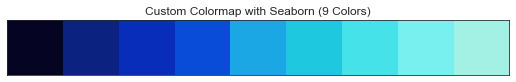

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def hex_to_rgb(hex_code):
    """Convert hex color to RGB."""
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_custom_colormap(hex_colors=['#050423', '#0D2CA0', '#042ED4', '#1BA7E3', '#20D5DE', '#6CF0F5', '#A2F1E4'],
                            num_colors=9):
    """Create a custom colormap with specified number of colors from hex color list."""
    # Convert hex colors to RGB
    colors = [hex_to_rgb(color) for color in hex_colors]
    
    positions = np.linspace(0, 1, len(colors))  # Equally spaced positions for original colors
    
    # Interpolate colors
    new_positions = np.linspace(0, 1, num_colors)
    new_colors = np.array([np.interp(new_positions, positions, [c[0] for c in colors]),
                           np.interp(new_positions, positions, [c[1] for c in colors]),
                           np.interp(new_positions, positions, [c[2] for c in colors])]).T
    
    # Convert to list of RGB tuples
    rgb_tuples = [(r, g, b) for r, g, b in zip(new_colors[:, 0], new_colors[:, 1], new_colors[:, 2])]
    
    return rgb_tuples

# Define hex colors
hex_colors = ['#050423', '#0D2CA0', '#042ED4', '#1BA7E3', '#20D5DE', '#6CF0F5', '#A2F1E4']

# Create the custom colormap with 9 colors
custom_palette = create_custom_colormap(hex_colors, num_colors=9)

# Test compatibility with Seaborn
sns.palplot(custom_palette)
plt.title('Custom Colormap with Seaborn (9 Colors)')
plt.show()

# Import Data

In [4]:
#Bioreplicates 
# 20240114flow_exp20240111_p2
# 20240120flow_exp20240117_p2
# -----------------------------------------------------
# 20240229flow_exp20240226_p1_BioA
# 20240229flow_exp20240226_p2_BioB
# 20240229flow_exp20240226_p3_BioC

#display( pd.unique( data['bioreplicate'] ))

In [5]:
# Import Data - bioreplicate 1 
folder = '20240114flow_exp20240111_p2'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder 

In [6]:
# Import Data - bioreplicate 2 
folder = '20240120flow_exp20240117_p2'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder 

In [7]:
# Import Data - bioreplicate 4 
folder = '20240229flow_exp20240226_p1_BioA'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data4 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data4['bioreplicate'] = folder 

In [8]:
# Import Data - bioreplicate 5 
folder = '20240229flow_exp20240226_p2_BioB'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data5 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data5['bioreplicate'] = folder 

In [9]:
# Import Data - bioreplicate 6 
folder = '20240229flow_exp20240226_p3_BioC'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
data6 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data6['bioreplicate'] = folder 

Concatenate Data, iRFP670 Gate, Add conditions

In [10]:
data = pd.concat( [data1, data2, data4, data5, data6], ignore_index=True)
#data 3 is lowest one, outlier 

In [11]:
data = data[ data['mRuby2-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

In [12]:
#Add new condtion 
data['bioreplicate_reporter'] = data['bioreplicate'] + '_' + data['reporter']
data['ZF43_str'] = data['ZF43'].astype('str') 
data['ZF43_ng'] = data['ZF43']*112 
data['ZF43_ng_str'] =data['ZF43_ng'].astype('str') 
data['rept_ZF'] = data['reporter'] + '.' + str(data['ZF43_str']) 
data['cond'] = data['reporter'] + '.' + str(data['ZF43_str']) + '.' + data['bioreplicate']

iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]
mGL_gate=200
data_iRFP670gated['mGL_gate'] = np.where(data_iRFP670gated['mGL-A']>mGL_gate, '+', '-')
display(data_iRFP670gated.head())

<ipython-input-12-ca3baa1a96b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['mGL_gate'] = np.where(data_iRFP670gated['mGL-A']>mGL_gate, '+', '-')


,reporter,ZF43,well,population,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,...,Time,bioreplicate,log10 mGL-A,bioreplicate_reporter,ZF43_str,ZF43_ng,ZF43_ng_str,rept_ZF,cond,mGL_gate
25,loxPrept 0xCre,0.0,A10,Single Cells,353299,217170,101,178070,130715,113,...,0.102510,20240114flow_exp20240111_p2,1.755875,20240114flow_exp20240111_p2_loxPrept 0xCre,0.0,0.0,0.0,loxPrept 0xCre.0 0.0\n25 ...,loxPrept 0xCre.0 0.0\n25 ...,-
26,loxPrept 0xCre,0.0,A10,Single Cells,401235,222145,116,267288,207228,116,...,0.103515,20240114flow_exp20240111_p2,1.079181,20240114flow_exp20240111_p2_loxPrept 0xCre,0.0,0.0,0.0,loxPrept 0xCre.0 0.0\n25 ...,loxPrept 0xCre.0 0.0\n25 ...,-
35,loxPrept 0xCre,0.0,A10,Single Cells,293274,173865,111,284422,180946,111,...,0.145725,20240114flow_exp20240111_p2,1.612784,20240114flow_exp20240111_p2_loxPrept 0xCre,0.0,0.0,0.0,loxPrept 0xCre.0 0.0\n25 ...,loxPrept 0xCre.0 0.0\n25 ...,-
39,loxPrept 0xCre,0.0,A10,Single Cells,428293,228453,111,322615,206044,118,...,0.153765,20240114flow_exp20240111_p2,0.301030,20240114flow_exp20240111_p2_loxPrept 0xCre,0.0,0.0,0.0,loxPrept 0xCre.0 0.0\n25 ...,loxPrept 0xCre.0 0.0\n25 ...,-
40,loxPrept 0xCre,0.0,A10,Single Cells,385858,264732,102,196986,138442,111,...,0.155775,20240114flow_exp20240111_p2,1.491362,20240114flow_exp20240111_p2_loxPrept 0xCre,0.0,0.0,0.0,loxPrept 0xCre.0 0.0\n25 ...,loxPrept 0xCre.0 0.0\n25 ...,-


In [13]:
display(pd.unique(data_iRFP670gated['reporter']))

array(['loxPrept 0xCre', 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre',
       'loxPrept 0.1xCre', 'iRFP670', <NA>], dtype=object)

See Individual Replicate Analysis

In [14]:
# https://mitprod.sharepoint.com/:p:/s/GallowayLab/EQPVmV9kehhBgsdqt_Sk9O8BAfgiYRY1pIjHioyJ-aOPoA

# Histogram of titration

In [ ]:
# Palette
ZF43_palette = {  1: 'red', 
       0.5: 'orange',
        0.25:  'gold',
       0.125: 'lime',
      0.0625: 'teal',
        0.03125: 'blue',
        0.01563: 'plum' ,
        0.00781: 'darkviolet', 
        0: 'black'
}

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

ycat = 'TagBFP-A'; xcat = 'mGL-A'; hue = 'ZF43_str'; palette = 'winter'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ])


for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    plottitle = rept + ' histogram TagBFP'
    g = custom_density_plot(xcat=xcat,ycat=ycat,hue=hue,data=data_now,points = 10000, hue_order=hue_order,
                        savetitle='',plottitle=plottitle,palette=palette,
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),type=['contour'],alpha=0)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# Joint Plots of each titration level and -/+ Cre ##

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

ycat = 'TagBFP-A'; xcat = 'mGL-A'; hue = 'ZF43_str'; 
ZF_list = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ])
palette = create_custom_colormap(num_colors=len(ZF_list))
hue = 'ZF43_str'
hue_order = None
vline=[200]
hline = 200

for rept in repts: 
    for i in range(len(ZF_list)):
        data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
        data_now = data_now[ data_now['ZF43_str']== ZF_list[i]]
        data_now = data_now[ data_now['bioreplicate']== '20240229flow_exp20240226_p3_BioC']
        palette_now = pd.array([palette[i]])
        plottitle = rept + 'b6h co' + ZF_list[i]
        g = custom_density_plot(xcat=xcat,ycat=ycat,hue=hue,data=data_now,points = 10000, hue_order=hue_order,
                            savetitle='',plottitle='',palette=palette_now,
                            hline=hline, vline=vline,
                            legend=False,
                            xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),type=['contour'],alpha=0)
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# Summary Calculations  - Points are Bioreplicates ##

In [16]:
df = data_iRFP670gated

by = ['reporter','ZF43','ZF43_str', 'rept_ZF','bioreplicate', 'cond', 'bioreplicate_reporter'] #how to filter results, columns
x = ['mGL-A','iRFP670-A', 'TagBFP-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s = calc_stats(df,by,x,stat)
#display(s)

#Make summary plots for the mGLgated on each side of the bimodality 
by = ['reporter','ZF43','ZF43_str', 'rept_ZF','bioreplicate', 'cond', 'bioreplicate_reporter', 'mGL_gate'] #how to filter results, columns
s2 = calc_stats(df,by,x,stat)

display(s)

df = s 
by = ['reporter','ZF43'] #how to filter results, columns
x = ['mGL-A_gmean']
stat = [np.std, np.mean] #statistics to calculate
s_means = calc_stats(df,by,x,stat)
display(s_means)


,reporter,ZF43,ZF43_str,rept_ZF,bioreplicate,cond,bioreplicate_reporter,mGL-A_gmean,mGL-A_median,mGL-A_std,...,iRFP670-A_gmean,iRFP670-A_median,iRFP670-A_std,iRFP670-A_mean,TagBFP-A_gmean,TagBFP-A_median,TagBFP-A_std,TagBFP-A_mean,Fraction,Count
0,iRFP670,0.0,0.0,iRFP670.0 0.0\n25 0.0...,20240114flow_exp20240111_p2,iRFP670.0 0.0\n25 0.0...,20240114flow_exp20240111_p2_iRFP670,36.840696,46.0,46.896489,...,64242.152247,67904.0,51167.896807,79099.216870,34.864413,43.0,38.824801,51.400297,1.0,8761
1,loxPrept 0.1xCre,0.0,0.0,loxPrept 0.1xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2,loxPrept 0.1xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2_loxPrept 0.1xCre,37.029622,46.0,50.034875,...,61659.980595,65959.0,48112.773401,75606.753003,34.969940,43.0,38.601194,51.242570,1.0,12652
2,loxPrept 0xCre,0.0,0.0,loxPrept 0xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2,loxPrept 0xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2_loxPrept 0xCre,37.735799,46.0,38.889890,...,62587.934249,66272.5,46448.026436,75746.385829,35.574023,44.0,39.482119,52.375847,1.0,11220
3,pTET021_203bp 0.1xCre,0.0,0.0,pTET021_203bp 0.1xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2,pTET021_203bp 0.1xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2_pTET021_203bp 0.1xCre,42.501266,52.0,94.696901,...,55958.796881,59691.0,46918.983738,69928.187440,34.898292,43.0,171.634588,56.023156,1.0,11401
4,pTET021_203bp 0.1xCre,0.0,0.0,pTET021_203bp 0.1xCre.0 0.0\n25 ...,20240120flow_exp20240117_p2,pTET021_203bp 0.1xCre.0 0.0\n25 ...,20240120flow_exp20240117_p2_pTET021_203bp 0.1xCre,70.492455,73.0,5836.040534,...,41370.887098,40193.0,49960.510066,57879.791373,35.226277,43.0,41.790487,53.109804,1.0,1275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,pTET021_203bp 0xCre,1.0,1.0,pTET021_203bp 0xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2,pTET021_203bp 0xCre.0 0.0\n25 ...,20240114flow_exp20240111_p2_pTET021_203bp 0xCre,583.978205,599.0,1750.925137,...,45410.151035,47636.0,34963.433341,55128.816652,3680.430159,4663.0,5908.570237,6198.871782,1.0,7963
89,pTET021_203bp 0xCre,1.0,1.0,pTET021_203bp 0xCre.0 0.0\n25 ...,20240120flow_exp20240117_p2,pTET021_203bp 0xCre.0 0.0\n25 ...,20240120flow_exp20240117_p2_pTET021_203bp 0xCre,484.103222,426.0,5825.500961,...,36948.281538,34748.0,45811.323762,51320.992815,1772.414758,1678.0,5862.720021,3717.226061,1.0,7237
90,pTET021_203bp 0xCre,1.0,1.0,pTET021_203bp 0xCre.0 0.0\n25 ...,20240229flow_exp20240226_p1_BioA,pTET021_203bp 0xCre.0 0.0\n25 ...,20240229flow_exp20240226_p1_BioA_pTET021_203bp...,373.944256,354.0,1328.993303,...,45822.470332,47310.5,43772.888353,58846.737897,2724.141555,3005.0,6232.501058,5099.522461,1.0,43586
91,pTET021_203bp 0xCre,1.0,1.0,pTET021_203bp 0xCre.0 0.0\n25 ...,20240229flow_exp20240226_p2_BioB,pTET021_203bp 0xCre.0 0.0\n25 ...,20240229flow_exp20240226_p2_BioB_pTET021_203bp...,457.389155,439.0,1659.570777,...,48404.118802,50398.0,44088.588123,61479.888800,3023.522387,3473.0,6327.646751,5505.840318,1.0,64829


,reporter,ZF43,mGL-A_gmean_std,mGL-A_gmean_mean,Fraction,Count
0,iRFP670,0.00000,NaN,36.840696,1.000000,1
1,loxPrept 0.1xCre,0.00000,NaN,37.029622,1.000000,1
2,loxPrept 0xCre,0.00000,NaN,37.735799,1.000000,1
3,pTET021_203bp 0.1xCre,0.00000,10.817306,56.715716,0.111111,5
4,pTET021_203bp 0.1xCre,0.00781,68.120195,516.462469,0.111111,5
5,pTET021_203bp 0.1xCre,0.01563,121.053670,900.550609,0.111111,5
6,pTET021_203bp 0.1xCre,0.03125,218.461488,1345.383296,0.111111,5
7,pTET021_203bp 0.1xCre,0.06250,285.594116,1554.507322,0.111111,5
8,pTET021_203bp 0.1xCre,0.12500,362.583171,1658.675772,0.111111,5
9,pTET021_203bp 0.1xCre,0.25000,407.349381,1672.338148,0.111111,5


In [16]:
# Save data 
s.to_excel('FigS8_ZF43plasmidtitration.xlsx',index=False)
s2.to_excel('FigS8_ZF43plasmidtitration_mGLgated.xlsx',index=False)

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean', 'TagBFP-A_gmean', 'iRFP670-A_gmean' ]
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = 'reporter';  hueorder = repts; pairs = None
palette = 'muted'
order = None
pairs = [ [(1,'pTET021_203bp 0xCre'), (1,'pTET021_203bp 0.1xCre')], 
         [(0.5,'pTET021_203bp 0xCre'), (0.5,'pTET021_203bp 0.1xCre')], 
         [(0.25,'pTET021_203bp 0xCre'), (0.25,'pTET021_203bp 0.1xCre')], 
         [(0.125,'pTET021_203bp 0xCre'), (0.125,'pTET021_203bp 0.1xCre')], 
         [(0.0625,'pTET021_203bp 0xCre'), (0.0625,'pTET021_203bp 0.1xCre')],
         [(0.03125,'pTET021_203bp 0xCre'), (0.03125,'pTET021_203bp 0.1xCre')],
         [(0.125,'pTET021_203bp 0.1xCre'), (1,'pTET021_203bp 0.1xCre')], 
        [(0.125,'pTET021_203bp 0xCre'), (1,'pTET021_203bp 0xCre')]
         ]

yscales = pd.array(['log', 'linear'])
ylim = [1e1, 0.3e4]


data_now = s[ s['reporter'].isin(repts)]
for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
            yscale = yscale_now
            plottitle = 'Cre_add ' + stat + yscale_now
            g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                ylim = ylim, pairs = pairs)
            g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


Summary plot by bioreplicate

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean']
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = 'reporter';  hueorder = repts; pairs = None
palette = 'muted'
order = None
pairs = [ ]

yscales = pd.array(['log'])
ylim = [1e1, 0.3e4]

bioreps = pd.unique( s['bioreplicate'])

for biorep in bioreps:
    s_now = s[ s['bioreplicate']==biorep]
    data_now = s_now[ s_now['reporter'].isin(repts)]
    for stat in stat_list: 
        y = stat
        for yscale_now in yscales:
                yscale = yscale_now
                plottitle = biorep
                g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                                    hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                    ylim = ylim, pairs = pairs)
                g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


Normalize by ZF43 at 0.125 no Cre or 1x no Cre

In [ ]:
# #For each bioreplicate, get the value at ZF43 at 0.125 or 1 X and append it to a dictionary

# #only get the relevant part of the s dataframe
# repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
# s_subset = s[ s['reporter'].isin(repts)]

# #start dictionary with values that dont matter
# map_ZF43norm = { 'test': 'test', 'test2': 'test2'}
# #get the list of the bioreplicates 
# biorep_repts = pd.unique( s_subset['bioreplicate'])
# for rep in biorep_repts: # for each biorep
#     s_now = s_subset[ s_subset['bioreplicate'] == rep] # go to that specific biorep 
#     s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
#     s_now = s_now[ s_now['ZF43'] == 0.125] #select that specific ZF43 value
#     #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
#     map_ZF43norm[rep] = s_now.iloc[0]['mGL-A_gmean']
# #Map the values to the other column 
# s_subset['ZF43_0.125'] = s_subset['bioreplicate'].map(map_ZF43norm).astype(float)
# s_subset['mGL-A_gmean norm ZF43_0.125'] = (s_subset['mGL-A_gmean']) / (s_subset['ZF43_0.125'])
# s_subset['mGL-A_gmean norm ZF43_0.125 LOG'] = np.log10(s_subset['mGL-A_gmean']) / np.log10(s_subset['ZF43_0.125'])

# #start dictionary with values that dont matter
# map_ZF43norm2 = { 'test': 'test', 'test2': 'test2'}
# #get the list of the bioreplicates 
# biorep_repts = pd.unique( s_subset['bioreplicate'])
# for rep in biorep_repts: # for each biorep
#     s_now = s_subset[ s_subset['bioreplicate'] == rep] # go to that specific biorep 
#     s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
#     s_now = s_now[ s_now['ZF43'] == 1] #select that specific ZF43 value
#     #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
#     map_ZF43norm2[rep] = s_now.iloc[0]['mGL-A_gmean']
# #Map the values to the other column 
# s_subset['ZF43_1'] = s_subset['bioreplicate'].map(map_ZF43norm2).astype(float)
# s_subset['mGL-A_gmean norm ZF43_1'] = (s_subset['mGL-A_gmean']) / (s_subset['ZF43_1'])
# s_subset['mGL-A_gmean norm ZF43_1 LOG'] = np.log10(s_subset['mGL-A_gmean']) / np.log10(s_subset['ZF43_1'])


In [17]:

#For each bioreplicate, get the value at ZF43 at 0.125 and append it to a dictionary
ZFa = 'ZF43'
ZFa_color = 'TagBFP-A'

#start dictionary with values that dont matter
map_mGLnorm = { 'test': 'test', 'test2': 'test2'} #for normalizing mGL
map_BFPnorm = {'test':'test'}
map_mGLnorm2 = {'test':'test'}
map_BFPnorm2 = {'test':'test'}
#only get the relevant part of the s dataframe
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
s_subset = s[ s['reporter'].isin(repts)]
s2_subset = s2[ s2['reporter'].isin(repts)]; 
s2_subset= s2_subset[ s2_subset['mGL_gate']=='+']
#get the list of the bioreplicates 
biorep_repts = pd.unique( s_subset['bioreplicate'])


for rep in biorep_repts: # for each biorep
    
    #All data
    s_now = s_subset[ s_subset['bioreplicate'] == rep] # go to that specific biorep 
    s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
    s_now = s_now[ s_now[ZFa] == 0.125] #select that specific ZF value
    #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
    map_mGLnorm[rep] = s_now.iloc[0]['mGL-A_gmean']
    map_BFPnorm[rep]= s_now.iloc[0][ZFa_color+'_gmean']

    # s2_subset -- mGL positive only 
    s_now = s2_subset[ s2_subset['bioreplicate'] == rep] # go to that specific biorep 
    s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
    s_now = s_now[ s_now[ZFa] == 0.125] #select that specific ZF value
    #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
    map_mGLnorm2[rep] = s_now.iloc[0]['mGL-A_gmean']
    map_BFPnorm2[rep]= s_now.iloc[0][ZFa_color+'_gmean']

#Map the values to the other column 
#All data
s_subset['ZF43_0.125_mGL'] = s_subset['bioreplicate'].map(map_mGLnorm).astype(float)
s_subset['mGL-A_gmean norm ZF43_0.125'] = (s_subset['mGL-A_gmean']) / (s_subset['ZF43_0.125_mGL'])
s_subset['ZF43_0.125_TagBFP'] = s_subset['bioreplicate'].map(map_BFPnorm).astype(float)
s_subset['TagBFP-A_gmean norm ZF43_0.125'] = (s_subset['TagBFP-A_gmean']) / (s_subset['ZF43_0.125_TagBFP'])
# mGL positive only 
s2_subset['ZF43_0.125_mGL'] = s2_subset['bioreplicate'].map(map_mGLnorm2).astype(float)
s2_subset['mGL-A_gmean norm ZF43_0.125'] = (s2_subset['mGL-A_gmean']) / (s2_subset['ZF43_0.125_mGL'])
s2_subset['ZF43_0.125_TagBFP'] = s2_subset['bioreplicate'].map(map_BFPnorm2).astype(float)
s2_subset['TagBFP-A_gmean norm ZF43_0.125'] = (s2_subset['TagBFP-A_gmean']) / (s2_subset['ZF43_0.125_TagBFP'])

#Consolidate all bioreps into single points 
df = s_subset
by = ['reporter','ZF43','ZF43_str', 'rept_ZF'] #how to filter results, columns
x = ['mGL-A_gmean','iRFP670-A_gmean', 'TagBFP-A_gmean', 'mGL-A_gmean norm ZF43_0.125', 'TagBFP-A_gmean norm ZF43_0.125','Fraction'] #which parameter to calculate results on
stat = [np.std, np.mean] #statistics to calculate
s_subset_means = calc_stats(df,by,x,stat)
df = s2_subset
s2_subset_means = calc_stats(df,by,x,stat)

s_subset_means['Fraction_mGL+_mean'] = s2_subset_means['Fraction_mean']
s_subset_means['Fraction_mGL+_std'] = s2_subset_means['Fraction_std']

display(s_subset_means)



<ipython-input-17-5a00eef77102>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_subset['ZF43_0.125_mGL'] = s_subset['bioreplicate'].map(map_mGLnorm).astype(float)
<ipython-input-17-5a00eef77102>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_subset['mGL-A_gmean norm ZF43_0.125'] = (s_subset['mGL-A_gmean']) / (s_subset['ZF43_0.125_mGL'])
<ipython-input-17-5a00eef77102>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,reporter,ZF43,ZF43_str,rept_ZF,mGL-A_gmean_std,mGL-A_gmean_mean,iRFP670-A_gmean_std,iRFP670-A_gmean_mean,TagBFP-A_gmean_std,TagBFP-A_gmean_mean,mGL-A_gmean norm ZF43_0.125_std,mGL-A_gmean norm ZF43_0.125_mean,TagBFP-A_gmean norm ZF43_0.125_std,TagBFP-A_gmean norm ZF43_0.125_mean,Fraction_std,Fraction_mean,Fraction,Count,Fraction_mGL+_mean,Fraction_mGL+_std
0,pTET021_203bp 0.1xCre,0.00000,0.0,pTET021_203bp 0.1xCre.0 0.0\n25 ...,10.817306,56.715716,12905.400649,61607.050911,1.303718,35.758863,0.042907,0.174775,0.027484,0.110841,0.0,1.0,1.0,5,0.073334,0.047563
1,pTET021_203bp 0.1xCre,0.00781,0.00781,pTET021_203bp 0.1xCre.0 0.0\n25 ...,68.120195,516.462469,11936.358182,69394.767794,3.455395,62.496439,0.335568,1.597731,0.039822,0.192003,0.0,1.0,1.0,5,0.618319,0.023562
2,pTET021_203bp 0.1xCre,0.01563,0.01563,pTET021_203bp 0.1xCre.0 0.0\n25 ...,121.053670,900.550609,11037.650231,67215.741776,9.274944,88.842603,0.584432,2.783036,0.045681,0.270350,0.0,1.0,1.0,5,0.755839,0.016381
3,pTET021_203bp 0.1xCre,0.03125,0.03125,pTET021_203bp 0.1xCre.0 0.0\n25 ...,218.461488,1345.383296,9074.900923,62920.124227,18.266133,139.753044,0.681932,4.118119,0.051925,0.421866,0.0,1.0,1.0,5,0.837647,0.011848
4,pTET021_203bp 0.1xCre,0.06250,0.0625,pTET021_203bp 0.1xCre.0 0.0\n25 ...,285.594116,1554.507322,8540.549767,57405.305782,41.440619,213.996314,0.754876,4.736728,0.080821,0.639213,0.0,1.0,1.0,5,0.879096,0.015979
5,pTET021_203bp 0.1xCre,0.12500,0.125,pTET021_203bp 0.1xCre.0 0.0\n25 ...,362.583171,1658.675772,8164.077266,52887.646109,96.460054,371.922663,0.875243,5.027929,0.164864,1.096397,0.0,1.0,1.0,5,0.906334,0.023984
6,pTET021_203bp 0.1xCre,0.25000,0.25,pTET021_203bp 0.1xCre.0 0.0\n25 ...,407.349381,1672.338148,6845.825229,49002.879690,189.228955,642.021914,1.031849,5.065733,0.410703,1.887517,0.0,1.0,1.0,5,0.919485,0.032042
7,pTET021_203bp 0.1xCre,0.50000,0.5,pTET021_203bp 0.1xCre.0 0.0\n25 ...,409.562264,1567.146171,6278.317222,47246.043245,378.697302,1356.779782,1.056057,4.741672,0.526443,3.981464,0.0,1.0,1.0,5,0.926115,0.039052
8,pTET021_203bp 0.1xCre,1.00000,1.0,pTET021_203bp 0.1xCre.0 0.0\n25 ...,487.202302,1481.615602,4812.663222,45642.406655,685.731933,2675.325822,1.737485,4.557604,1.794250,7.977990,0.0,1.0,1.0,5,0.929819,0.049062
9,pTET021_203bp 0xCre,0.00000,0.0,pTET021_203bp 0xCre.0 0.0\n25 ...,7.940545,42.881755,8858.516078,56787.477706,0.569954,34.902181,0.035915,0.132864,0.025179,0.107834,0.0,1.0,1.0,5,0.019621,0.030480


In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean norm ZF43_0.125']
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = 'reporter';  hueorder = repts; pairs = None
palette = 'muted'
order = None
pairs = [ [(1,'pTET021_203bp 0xCre'), (1,'pTET021_203bp 0.1xCre')], 
         [(0.5,'pTET021_203bp 0xCre'), (0.5,'pTET021_203bp 0.1xCre')], 
         [(0.25,'pTET021_203bp 0xCre'), (0.25,'pTET021_203bp 0.1xCre')], 
         [(0.125,'pTET021_203bp 0xCre'), (0.125,'pTET021_203bp 0.1xCre')], 
         [(0.0625,'pTET021_203bp 0xCre'), (0.0625,'pTET021_203bp 0.1xCre')],
         [(0.03125,'pTET021_203bp 0xCre'), (0.03125,'pTET021_203bp 0.1xCre')],
         [(0.125,'pTET021_203bp 0.1xCre'), (1,'pTET021_203bp 0.1xCre')], 
        [(0.125,'pTET021_203bp 0xCre'), (1,'pTET021_203bp 0xCre')]
         ]

yscales = pd.array(['linear'])
ylim = [0,1.25]

data_now = s_subset[ s_subset['reporter'].isin(repts)]
for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
            yscale = yscale_now
            plottitle = 'Cre_add ' + stat
            g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                ylim = ylim,pairs = pairs, legend=False)
            #g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Scatter Plots ##

*Not Normalized Scatterplot*

In [ ]:
#only get the relevant part of the s dataframe
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
data_now = s[ s['reporter'].isin(repts)]

y= 'mGL-A_gmean'
x = 'TagBFP-A_gmean'
hue = 'ZF43_str'
palette = 'winter'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ])
style = 'reporter'
ylim = [1e1, 1e4]
xlim = ylim

plottitle = 'Scatterplot all'
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

*Scatter Plots Normalized mGL, not normal mCh*

In [ ]:
#Normalized by 0.125 for the mGL 
#only get the relevant part of the s dataframe
data_now = s_subset
x= 'TagBFP-A_gmean'
style = 'reporter'
xlim = [1e1, 1e4]
ylim = [0.1, 20]
yscale = 'log'
y= 'mGL-A_gmean'
x = 'TagBFP-A_gmean'
hue = 'ZF43_str'
palette = 'winter'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ])
y = 'mGL-A_gmean norm ZF43_0.125'
plottitle = 'Scatter ' + y
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                plottitle=plottitle, style=style, 
                ylim=ylim, xlim=xlim, s= 50, yscale=yscale)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

*Scatter Plot, both normalized*

In [ ]:
# both normalized
#only get the relevant part of the s dataframe
data_now = s_subset_means
x= 'TagBFP-A_gmean norm ZF43_0.125_mean'
hue = 'ZF43_str'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0"])
palette = create_custom_colormap(num_colors=len(hue_order))
style = 'reporter'
xlim = [0.08,10]
ylim = [0.08, 10]
yscale = 'log'
stat_list = ['mGL-A_gmean norm ZF43_0.125_mean']
xlabel = 'TagBFP-A gmean norm.'
ylabel = 'mGL-A gmean norm.'
fontsize = 15; 
xsize = 4; ysize=xsize
std_x = 'TagBFP-A_gmean norm ZF43_0.125_std'
std_y = 'mGL-A_gmean norm ZF43_0.125_std'

for stat in stat_list:
  y = stat
plottitle = 'Scatterplot both norm 0.125x Mean'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale, std_x =std_x, std_y = std_y, legend=False)
#g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

ylim = [0.3, 10]

plottitle = 'Scatter bothnorm0.125x mGLpos Mean'
data_now = s2_subset_means[ s2_subset_means['ZF43_str']!= '0.0']
plt.figure(figsize=(xsize,ysize))
h = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, legend=False,
                 fontsize=fontsize, labelsize=fontsize, std_x =std_x, std_y = std_y)
#h.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


# #Overaly plot of the different promoters 
# plottitle = 'Scatter both norm0.125x promEFSnorm'
# data_now = s2_subset_means[ s2_subset_means['ZF43_str']!= '0.0']
# palette = ['black','gray']; hue= 'reporter'; hue_order = None; 
# plt.figure(figsize=(xsize,ysize))
# k = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
#                  plottitle=plottitle, style=style, hue_order=hue_order,
#                  ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
#                  fontsize=fontsize, labelsize=fontsize)
# hue = 'ZF43'; hue_order = pd.array( ['pTET72 hPGK','pTET73 EFS','pTET74 UBC.d','pTET011 EF1a'])
# data_now = s_promoters43_normEFS[s_promoters43_normEFS['ZF43'].isin(hue_order)]
# palette = 'winter'
# x = 'mCherry-A_gmean norm ZF43_EF1a'; y = 'mGL-A_gmean norm ZF43_EF1a'
# k = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
#                  plottitle=plottitle, style=style, hue_order=hue_order,
#                  ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
#                  fontsize=fontsize, labelsize=fontsize)
# k.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

Scatter Plot, both normalized +Model

In [ ]:
# overlaying curve based on MATLAB fitted parameters (single line)

data_now = s_subset_means

# identify leaky values
leaky_exp_noCre = data_now.loc[data_now['reporter'] == 'pTET021_203bp 0xCre', 'TagBFP-A_gmean norm ZF43_0.125_mean'].min()
leaky_exp_Cre = data_now.loc[data_now['reporter'] == 'pTET021_203bp 0.1xCre', 'TagBFP-A_gmean norm ZF43_0.125_mean'].min()

# use to adjust the datapoints if using normal axes
# data_now.loc[data_now['reporter'] == 'pTET021_203bp 0xCre', 'TagBFP-A_gmean norm ZF43_0.125'] -= leaky_exp_noCre
# data_now.loc[data_now['reporter'] == 'pTET021_203bp 0.1xCre', 'TagBFP-A_gmean norm ZF43_0.125'] -= leaky_exp_Cre

x= 'TagBFP-A_gmean norm ZF43_0.125_mean'
hue = 'ZF43_str'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0"])
palette = create_custom_colormap(num_colors=len(hue_order))
style = 'reporter'
xlim = [0.08,10]
ylim = [0.08, 10]
yscale = 'log'
stat_list = ['mGL-A_gmean norm ZF43_0.125_mean']
xlabel = 'Input: ZF2a-TagBFP-A gmean'
ylabel = 'Output: mGL-A gmean'
fontsize = 15; 
xsize = 4; ysize=xsize
std_x = 'TagBFP-A_gmean norm ZF43_0.125_std'
std_y = 'mGL-A_gmean norm ZF43_0.125_std'
for stat in stat_list:
  y = stat
plottitle = 'Scatter norm 0.125x Mean +Model'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale, std_x =std_x, std_y = std_y, legend=False)


# Define the function
def overlay_curve(x, k_cat_prime, K_M, n, alpha_prime):
    return k_cat_prime * (x ** n) / (K_M + (x ** n)) + alpha_prime

# Parameters for the curve, taken from MATLAB
n = 1

k_cat_prime_noCre = 1.124314
K_M_noCre = 0.188198
alpha_prime_noCre = 0.1364952

k_cat_prime_Cre = 5.19388
K_M_Cre = 0.200258
alpha_prime_Cre = 0.1477839


# Generate x values for plotting the curve
x_values = np.linspace(0, max(data_now['TagBFP-A_gmean norm ZF43_0.125_mean']), 500)

# Calculate corresponding y values using the overlay_curve function
# add leaky exp to shift the line 
y_values_noCre = overlay_curve(x_values, k_cat_prime_noCre, K_M_noCre, n, alpha_prime_noCre)
y_values_Cre = overlay_curve(x_values, k_cat_prime_Cre, K_M_Cre, n, alpha_prime_Cre)

x_values_noCre = x_values + leaky_exp_noCre
x_values_Cre = x_values + leaky_exp_Cre

# Plot the overlay curve on the existing plot
plt.plot(x_values_noCre, y_values_noCre, color='deepskyblue')
plt.plot(x_values_Cre, y_values_Cre, color='blue')

# Show the plot
plt.show()

# g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

import parameters for bootstrapped model fitting

In [ ]:
# generating confidence intervals in python after using MATLAB generated parameters (kcat and KM)
# import matlab generated values

filepath_kcat_noCre = './datafiles/kcat_noCre_ZF43.csv'
filepath_kcat_Cre = './datafiles/kcat_Cre_ZF43.csv'
filepath_KM_noCre = './datafiles/KM_noCre_ZF43.csv'
filepath_KM_Cre = './datafiles/KM_Cre_ZF43.csv'

kcat_noCre = pd.read_csv(filepath_kcat_noCre, header=None, names=['noCre'])
kcat_Cre = pd.read_csv(filepath_kcat_Cre, header=None, names=['Cre'])
KM_noCre = pd.read_csv(filepath_KM_noCre, header=None, names=['noCre'])
KM_Cre = pd.read_csv(filepath_KM_Cre, header=None, names=['Cre'])


In [ ]:
# format kcat and KM into df
kcat = pd.concat([kcat_noCre, kcat_Cre], axis=1)
km = pd.concat([KM_noCre, KM_Cre], axis=1)

# display(kcat) # for troubleshooting
# display(km)

In [ ]:
# using defined function to calculate corresponding curve for each bootstrapped parameter set

data_now = s_subset

# previously defined function
def overlay_curve(x, k_cat_prime, K_M, n, alpha_prime):
    return k_cat_prime * (x ** n) / (K_M + (x ** n)) + alpha_prime

# Parameters for the curve, taken from MATLAB
n = 1
alpha_prime_noCre = 0.0774
alpha_prime_Cre = 0.0764

# identify leaky values
leaky_exp_noCre = data_now.loc[data_now['reporter'] == 'pTET021_203bp 0xCre', 'TagBFP-A_gmean norm ZF43_0.125'].min()
leaky_exp_Cre = data_now.loc[data_now['reporter'] == 'pTET021_203bp 0.1xCre', 'TagBFP-A_gmean norm ZF43_0.125'].min()

x_values = np.linspace(0, max(data_now['TagBFP-A_gmean norm ZF43_0.125']), 1000)

# initialize
y_values_noCre = pd.DataFrame()
y_values_Cre = pd.DataFrame()

for index, row in kcat.iterrows():
    # Get parameters for the current row
    k_cat_prime = row['noCre']
    k_M = km.loc[index, 'noCre']
    
    # Calculate corresponding y values using the overlay_curve function
    y_values = overlay_curve(x_values, k_cat_prime, k_M, n, alpha_prime_noCre)
    
    # Store y_values in the DataFrame for noCre
    y_values_noCre[index] = y_values

y_values_noCre = y_values_noCre.transpose()

# Run the loop for 'Cre'
for index, row in kcat.iterrows():
    # Get parameters for the current row
    k_cat_prime = row['Cre']
    k_M = km.loc[index, 'Cre']
    
    # Calculate corresponding y values using the overlay_curve function
    y_values = overlay_curve(x_values, k_cat_prime, k_M, n, alpha_prime_Cre)
    
    # Store y_values in the DataFrame for Cre
    y_values_Cre[index] = y_values

y_values_Cre = y_values_Cre.transpose()

# display(y_values_noCre) # for troubleshooting

In [ ]:
# using defined function to calculate corresponding curve for each bootstrapped parameter set

# calculate mean values for each parameter for center line
mean_kcat_noCre = kcat['noCre'].mean()
mean_kcat_Cre = kcat['Cre'].mean()
mean_km_noCre = km['noCre'].mean()
mean_km_Cre = km['Cre'].mean()

y_values_noCre_mean = overlay_curve(x_values, mean_kcat_noCre, mean_km_noCre, n, alpha_prime_noCre)
y_values_Cre_mean = overlay_curve(x_values, mean_kcat_Cre, mean_km_Cre, n, alpha_prime_Cre)

display(y_values_Cre_mean)

In [ ]:
markers = ['o', 'v']

# sort the resulting curves in ascending order per x value
y_values_noCre_sorted = y_values_noCre.apply(lambda col: col.sort_values().values)
y_values_Cre_sorted = y_values_Cre.apply(lambda col: col.sort_values().values)

# keep only the 2.5% and 97.5% percentile (95% CI)
y_values_noCre_lower = y_values_noCre_sorted.iloc[249]
y_values_Cre_lower = y_values_Cre_sorted.iloc[249]
y_values_noCre_higher = y_values_noCre_sorted.iloc[9749]
y_values_Cre_higher = y_values_Cre_sorted.iloc[9749]

x_values_noCre = x_values + leaky_exp_noCre
x_values_Cre = x_values + leaky_exp_Cre

# plot the original scatterplot
#Plot Scatterplot 
data_now = s_subset_means
style = 'reporter'; hue=hue = 'ZF43_str'; hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0"])
palette = create_custom_colormap(num_colors=len(hue_order))
x = 'TagBFP-A_gmean norm ZF43_0.125_mean'
y = 'mGL-A_gmean norm ZF43_0.125_mean'
xlabel = 'TagBFP-A gmean norm.'
ylabel = 'mGL-A gmean norm.'
xsize = 3
ysize = 3
xlim = [0.07,15]
ylim = [0.07,2e1]

x_std = 'TagBFP-A_gmean norm ZF43_0.125_std'
y_std = 'mGL-A_gmean norm ZF43_0.125_std'
plottitle = 'Scatterplot both norm 0.125x MEAN + 95CI'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, markers=markers,
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False, std_x=x_std, std_y=y_std)

# # Plot the overlay curve on the existing plot
# plt.plot(x_values_noCre, y_values_noCre_lower, color='darksalmon')
# plt.plot(x_values_noCre, y_values_noCre_higher, color='darksalmon')
# plt.plot(x_values_Cre, y_values_Cre_lower, color='red')
# plt.plot(x_values_Cre, y_values_Cre_higher, color='red')

# Plot the lightly shaded area between the curves
plt.fill_between(x_values_noCre, y_values_noCre_lower, y_values_noCre_higher, color='grey', alpha=0.2)
plt.fill_between(x_values_Cre, y_values_Cre_lower, y_values_Cre_higher, color='grey', alpha=0.2)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

# second iteration
plottitle = 'Scatterplot both norm 0.125x MEAN + 95CI + mean curve'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, markers=markers,
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False, std_x=x_std, std_y=y_std)

plt.plot(x_values_noCre, y_values_noCre_mean, color='grey', linewidth=0.5)
plt.plot(x_values_Cre, y_values_Cre_mean, color='grey', linewidth=0.5)

plt.fill_between(x_values_noCre, y_values_noCre_lower, y_values_noCre_higher, color='grey', alpha=0.2)
plt.fill_between(x_values_Cre, y_values_Cre_lower, y_values_Cre_higher, color='grey', alpha=0.2)

# Show the plot
plt.show()

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


In [ ]:
# generating summary plots with 95% CI error bars
mean_values = kcat.mean()
percentiles = kcat.quantile([0.025, 0.975])

# Calculate error bars
lower_error = mean_values.values - percentiles.loc[0.025].values
upper_error = percentiles.loc[0.975].values - mean_values.values

# Plot
plottitle='95_CI_kcat_ZF43'

plt.figure(figsize=(1, 1))

plt.errorbar(x=mean_values.index, y=mean_values.values, 
             yerr=[lower_error, upper_error], 
             fmt='o', capsize=5, color='black')

plt.title('k_cat', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylim(0,6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
mean_values = km.mean()
percentiles = km.quantile([0.025, 0.975])

# Plot
plottitle='95_CI_KM_ZF43'

plt.figure(figsize=(1, 1))

plt.errorbar(x=mean_values.index, y=mean_values.values, 
             yerr=np.abs(mean_values.values - percentiles.loc[0.025].values), 
             fmt='o', capsize=5, color='black')

plt.title('K_M', fontsize=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylim(0,0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

*Scatterplot mGL+ norm vs mGLFraction*

In [ ]:
# both normalized
#only get the relevant part of the s dataframe
data_now = s2_subset_means[ s2_subset_means['ZF43_str']!= '0.0']
x= 'Fraction_mean'
y = 'mGL-A_gmean norm ZF43_0.125_mean'
std_x = None #'Fraction_std'
std_y = 'mGL-A_gmean norm ZF43_0.125_std'
hue = 'ZF43_str'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0"])
palette = create_custom_colormap(num_colors=len(hue_order))
style = 'reporter'
xlim = [0.4,1]
ylim = [0.04,70]
xscale = 'linear'
yscale = 'log'
xlabel = 'mGL+ Fraction'
ylabel = 'mGL+ gmean  norm.'
fontsize = 15; 
xsize = 4; ysize=xsize
plottitle = 'Scatterplot mGL-gated mean norm v Frac'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale, xscale=xscale, 
                 std_x=std_x, std_y=std_y)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


*mGL-norm-gmean  all vs Fraction mGL+*

In [ ]:
# both normalized
#only get the relevant part of the s dataframe
data_now = s_subset_means[ s_subset_means['ZF43_str']!= '0.0']
x = 'Fraction_mGL+_mean'
y = 'mGL-A_gmean norm ZF43_0.125_mean'
std_x = None #'Fraction_mGL+_std'
std_y = 'mGL-A_gmean norm ZF43_0.125_std'
hue = 'ZF43_str'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', '1.0'])
palette = create_custom_colormap(num_colors=len(hue_order))
style = 'reporter'
xlim = [0.4,1]
ylim = [0.4,10]
xscale = 'linear'
yscale = 'log'
xlabel = 'mGL+ Fraction'
ylabel = 'mGL all gmean  norm.'
fontsize = 15; 
xsize = 4; ysize=xsize
plottitle = 'Scatterplot mGL-gated mean norm v Frac'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale, xscale=xscale, 
                 std_x=std_x, std_y= std_y)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

plottitle = 'Scattr mGL-gate mean norm v Frac +Cre'
data_now2 = data_now[ data_now['reporter']=='pTET021_203bp 0.1xCre']
xlim = [0.6,1]
ylim = [1,10]
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now2, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale, xscale=xscale, 
                 std_x=std_x, std_y= std_y)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

plottitle = 'Scattr mGL-gate mean norm v Frac noCre'
data_now2 = data_now[ data_now['reporter']=='pTET021_203bp 0xCre']
xlim = [0.4,0.8]
ylim = [0.4,2]
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now2, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale, xscale=xscale, 
                 std_x=std_x, std_y= std_y)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## 1D Histograms ##

**Gated on iRFP+**

In [ ]:
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

parameters = pd.array([ 'TagBFP-A','mGL-A']); hue = 'ZF43_str'; 

hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ]); hueorder=hue_order;
       
palette = create_custom_colormap(num_colors=len(hue_order))
xlim = [1e0,2e5]
xsize = 8
ysize = 1.8
fontsize = 16.5
#No gating on mGL 
for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    plottitle = rept + ' singlehis'
    #g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,
                         legendtitle='Condition', xlim=xlim, 
                         line=mGL_gate, 
                         fontsize=fontsize)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#All data together, no gating on mGL 
data_now = data_iRFP670gated[ data_iRFP670gated['reporter'].isin(repts)]
plottitle = 'all data singlehis'
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


**Gated on iRFP+ mGL+**

In [ ]:
## Gated by mGL+

repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

parameters = pd.array([ 'TagBFP-A','mGL-A']); hue = 'ZF43_str'; 

hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ]); hueorder=hue_order;
       
palette = 'winter'
xlim = [1e0,2e5]
xsize = 8
ysize = 1.8
fontsize = 10
#No gating on mGL 
for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    data_now = data_now[ data_now['mGL_gate']=='+']
    plottitle = rept + ' sin-h gate-mGL'
    #g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,
                         legendtitle='Condition', xlim=xlim, 
                         line=mGL_gate, 
                         fontsize=fontsize)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#All data together, no gating on mGL 
data_now = data_iRFP670gated[ data_iRFP670gated['reporter'].isin(repts)]
plottitle = 'all data singlehis'
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


1D Hist iRFP+ tagBFP+

In [ ]:
## Gated by mGL+

repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

parameters = pd.array([ 'TagBFP-A','mGL-A']); hue = 'ZF43_str'; 

hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0", ]); hueorder=hue_order;
       
palette = 'winter'
xlim = [1e0,2e5]
xsize = 8
ysize = 1.8
fontsize = 10
#No gating on mGL 
for rept in repts: 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    data_now = data_now[ data_now['TagBFP-A']>200]
    plottitle = rept + ' sin-h BFPpos'
    #g = plt.figure(figsize=(xsize,ysize))
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0,
                         legendtitle='Condition', xlim=xlim, 
                         line=mGL_gate, 
                         fontsize=fontsize)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Normalizing iRFP670 ##

Normalize by iRFP670

In [ ]:
s['mGL-A_gmean norm iRFP670'] = s['mGL-A_gmean'] / s['iRFP670-A_gmean']

#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean norm iRFP670' ]
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = 'reporter';  hueorder = repts; pairs = None
palette = 'muted'
order = None

yscales = pd.array(['log', 'linear'])

data_now = s[ s['reporter'].isin(repts)]
for stat in stat_list: 
    y = stat
    for yscale_now in yscales:
            yscale = yscale_now
            plottitle = 'Cre_add ' + stat
            g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot, 
                                #ylim = ylim
                                )
            g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

Summary PLots - separated -Cre, +Cre

In [ ]:
#Make a list of the stats that I want to plot 
stat_list = ['mGL-A_gmean', 'TagBFP-A_gmean' ]
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])

#Plot the summary stats of mean and g.mean 
x = 'ZF43'; x_rot = 45
hue = None;  hueorder = None; pairs = None
palette = ZF43_palette
order = None

yscales = pd.array(['log', 'linear'])

for rept in repts:
    data_now = s[ s['reporter']==rept]
    for stat in stat_list: 
        y = stat
        for yscale_now in yscales:
                yscale = yscale_now
                plottitle = rept + ' ' + stat
                g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                                hue_order = hueorder, plottitle=plottitle,yscale=yscale,x_rot = x_rot)
                g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

Normalize and Plot normalizing at 0.5X

In [ ]:

#For each bioreplicate, get the value at ZF43 at 0.125 and append it to a dictionary
ZFa = 'ZF43'
ZFa_color = 'TagBFP-A'

#start dictionary with values that dont matter
map_mGLnorm = { 'test': 'test', 'test2': 'test2'} #for normalizing mGL
map_BFPnorm = {'test':'test'}
map_mGLnorm2 = {'test':'test'}
map_BFPnorm2 = {'test':'test'}
#only get the relevant part of the s dataframe
repts = pd.array( [ 'pTET021_203bp 0xCre', 'pTET021_203bp 0.1xCre'])
s_subset = s[ s['reporter'].isin(repts)]
s2_subset = s2[ s2['reporter'].isin(repts)]; 
s2_subset= s2_subset[ s2_subset['mGL_gate']=='+']
#get the list of the bioreplicates 
biorep_repts = pd.unique( s_subset['bioreplicate'])


for rep in biorep_repts: # for each biorep
    
    #All data
    s_now = s_subset[ s_subset['bioreplicate'] == rep] # go to that specific biorep 
    s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
    s_now = s_now[ s_now[ZFa] == 0.5] #select that specific ZF value
    #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
    map_mGLnorm[rep] = s_now.iloc[0]['mGL-A_gmean']
    map_BFPnorm[rep]= s_now.iloc[0][ZFa_color+'_gmean']

    # s2_subset -- mGL positive only 
    s_now = s2_subset[ s2_subset['bioreplicate'] == rep] # go to that specific biorep 
    s_now = s_now[ s_now['reporter'] == 'pTET021_203bp 0xCre'] 
    s_now = s_now[ s_now[ZFa] == 0.5] #select that specific ZF value
    #print(s_now['mGL-A_gmean'], type(s_now['mGL-A_gmean']))
    map_mGLnorm2[rep] = s_now.iloc[0]['mGL-A_gmean']
    map_BFPnorm2[rep]= s_now.iloc[0][ZFa_color+'_gmean']

#Map the values to the other column 
#All data
s_subset['ZF43_0.5_mGL'] = s_subset['bioreplicate'].map(map_mGLnorm).astype(float)
s_subset['mGL-A_gmean norm ZF43_0.5'] = (s_subset['mGL-A_gmean']) / (s_subset['ZF43_0.5_mGL'])
s_subset['ZF43_0.5_TagBFP'] = s_subset['bioreplicate'].map(map_BFPnorm).astype(float)
s_subset['TagBFP-A_gmean norm ZF43_0.5'] = (s_subset['TagBFP-A_gmean']) / (s_subset['ZF43_0.5_TagBFP'])
# mGL positive only 
s2_subset['ZF43_0.5_mGL'] = s2_subset['bioreplicate'].map(map_mGLnorm2).astype(float)
s2_subset['mGL-A_gmean norm ZF43_0.5'] = (s2_subset['mGL-A_gmean']) / (s2_subset['ZF43_0.5_mGL'])
s2_subset['ZF43_0.5_TagBFP'] = s2_subset['bioreplicate'].map(map_BFPnorm2).astype(float)
s2_subset['TagBFP-A_gmean norm ZF43_0.5'] = (s2_subset['TagBFP-A_gmean']) / (s2_subset['ZF43_0.5_TagBFP'])


# Make Scatterplots of the normalized data 

# both normalized
#only get the relevant part of the s dataframe
data_now = s_subset
x= 'TagBFP-A_gmean norm ZF43_0.5'
hue = 'ZF43_str'
hue_order = pd.array(['0.0', '0.00781','0.01563','0.03125','0.0625','0.125', '0.25','0.5', "1.0"])
palette = create_custom_colormap(num_colors=len(hue_order))
style = 'reporter'
xlim = [0.01,5]
ylim = [0.04,70]
yscale = 'log'
stat_list = ['mGL-A_gmean norm ZF43_0.5']
xlabel = 'TagBFP-A gmean norm.'
ylabel = 'mGL-A gmean norm.'
fontsize = 15; 
xsize = 4; ysize=xsize

for stat in stat_list:
  y = stat
plottitle = 'Scatterplot both norm 0.5x'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, yscale = yscale)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

plottitle = 'Scatterplot both norm 0.5x mGLpos'
data_now = s2_subset[ s2_subset['ZF43_str']!= '0.0']
plt.figure(figsize=(xsize,ysize))
h = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, style=style, hue_order=hue_order,
                 ylim=ylim, xlim=xlim, s= 50, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize)
h.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')
